In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Dataset.csv')  
print(df[['Feature_1', 'Feature_2', 'Feature_3']].describe())


        Feature_1   Feature_2   Feature_3
count  611.000000  603.000000  610.000000
mean    16.747954    1.913765    2.262295
std      1.216812    0.830798    1.285279
min     15.000000    1.000000    1.000000
25%     16.000000    1.000000    1.000000
50%     17.000000    2.000000    2.000000
75%     18.000000    2.000000    3.000000
max     22.000000    4.000000    5.000000


In [3]:
df.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'famrel', 'freetime', 'goout', 'Dalc', 'health', 'absences',
       'G1', 'G2', 'G3', 'Feature_1', 'Feature_2', 'Feature_3', 'romantic'],
      dtype='object')

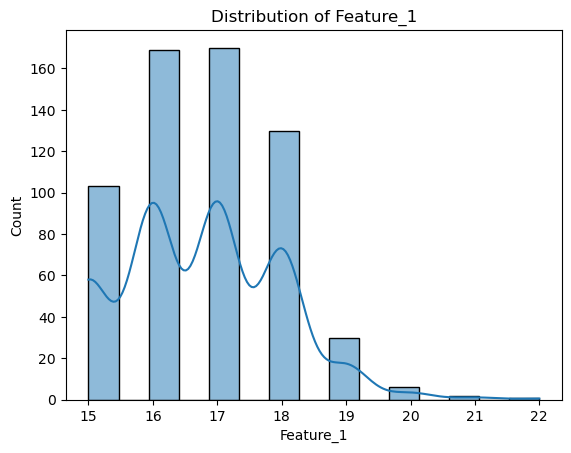

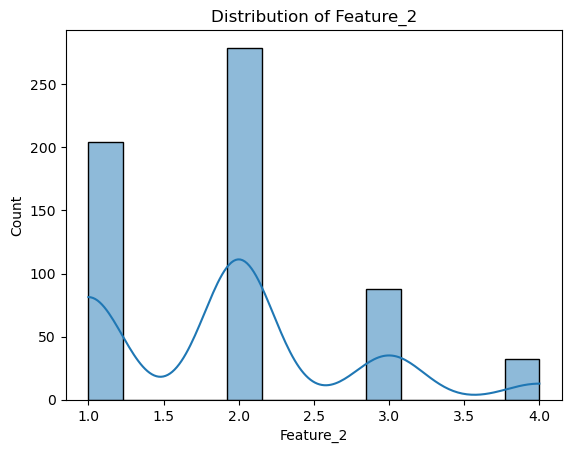

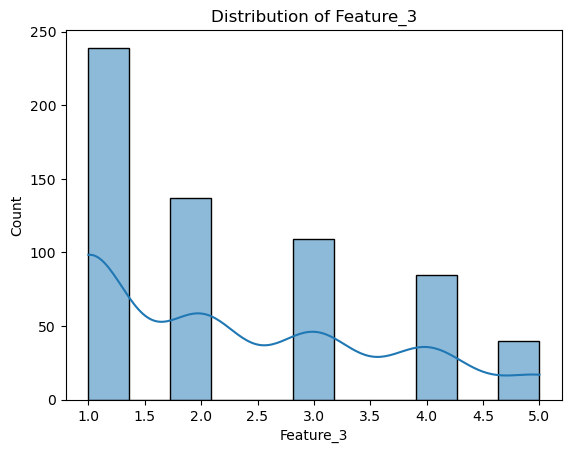

In [ ]:
for feature in ['Feature_1', 'Feature_2', 'Feature_3']:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

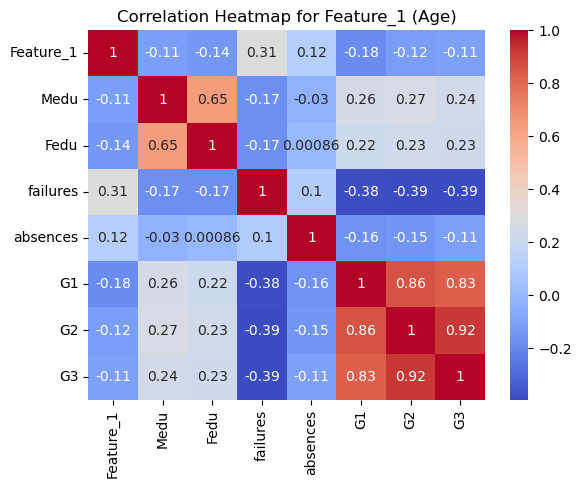

In [ ]:
# Feature 1 correlation heatmap with specific other features
age_related = df[['Feature_1', 'Medu', 'Fedu', 'failures', 'absences', 'G1', 'G2', 'G3']]
corr1 = age_related.corr()

sns.heatmap(corr1, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for Feature_1 (Age)")
plt.show()


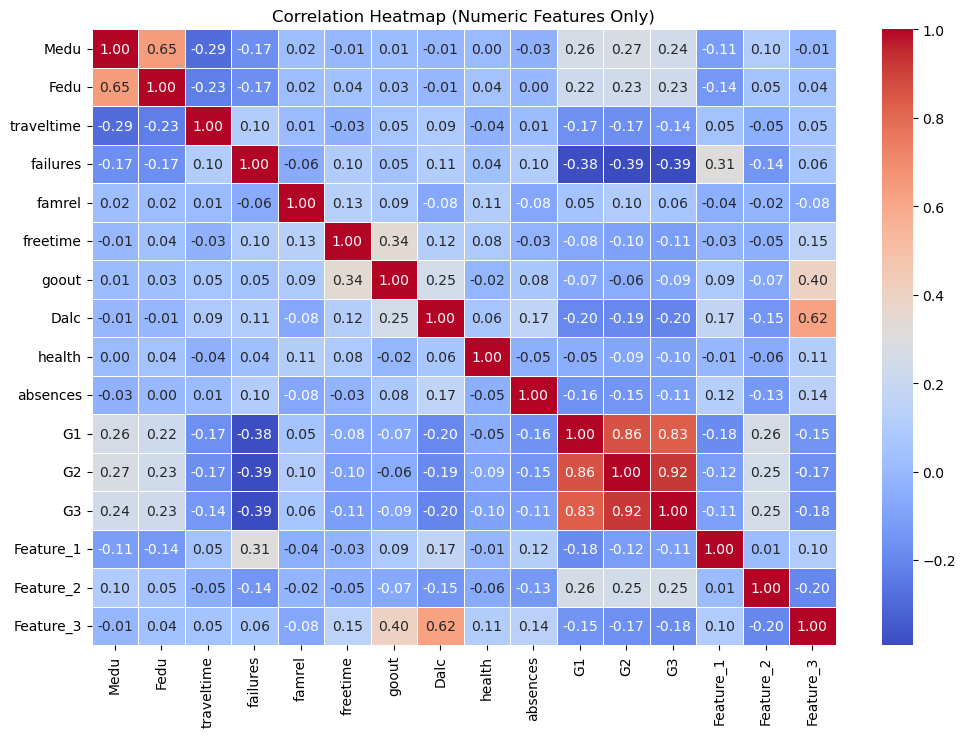

In [11]:
# Keep only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [ ]:
'F1 IS RELATED TO FAILURES SO = AGE'
'F2 IS RELATED TO G1,G1,G2 S0 MOST LIKELY = STUDY TIME'
'F3 IS RELATED TO DALC SO MOST LIKELY = Walc (weekend alcohol consumption)'

### LEVEL 2

In [12]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

higher        76
Fedu          73
traveltime    73
absences      69
famsize       50
Feature_2     46
freetime      45
Feature_3     39
Feature_1     38
G2            35
dtype: int64


| Feature        | Type                              | Imputation Strategy  | Justification                                                                |
| -------------- | --------------------------------- | -------------------- | ---------------------------------------------------------------------------- |
| **higher**     | Binary (`yes`/`no`)               | Mode (most frequent) | Reflects the most common future aspiration; likely skipped accidentally.     |
| **Fedu**       | Numeric (0–4)                     | Median               | Parental education is ordinal; median is robust to outliers or skew.         |
| **traveltime** | Ordinal (1–4)                     | Median               | Travel time categories are ordered; median preserves ordinal meaning.        |
| **absences**   | Numerical                         | Median               | Absences often have outliers; median prevents distortion.                    |
| **famsize**    | Categorical (`LE3`, `GT3`)        | Mode                 | Few unique values; students likely skipped or misunderstood the question.    |
| **Feature\_2** | Ordinal (likely `studytime`: 1–4) | Median               | Preserves the ordered nature; consistent with how `studytime` is structured. |
| **freetime**   | Ordinal (1–5)                     | Median               | Avoids bias from extreme responses; safe for ordinal scale.                  |
| **Feature\_3** | Ordinal (likely `Walc`: 1–5)      | Median               | Keeps ordinal structure; matches standard alcohol consumption encoding.      |
| **Feature\_1** | Numerical (likely `age`)          | Median               | Median avoids skew from outliers like adult learners.                        |
| **G2**         | Numerical (0–20)                  | Median               | Grades have skew due to performance; median avoids distortion by extremes.   |


In [15]:
# Binary categorical
df['higher'].fillna(df['higher'].mode()[0], inplace=True)
df['famsize'].fillna(df['famsize'].mode()[0], inplace=True)

# Ordinal and numeric features – use median
median_impute_cols = ['Fedu', 'traveltime', 'absences', 
                      'Feature_1', 'Feature_2', 'Feature_3',
                      'freetime', 'G2']
for col in median_impute_cols:
    df[col].fillna(df[col].median(), inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_34140\1694269361.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [ ]:
#final check
print(df.isnull().sum().sort_values(ascending=False).head())

school       0
nursery      0
Feature_3    0
Feature_2    0
Feature_1    0
dtype: int64


### LEVEL 3

####  Q1: Does parental education level influence student performance?

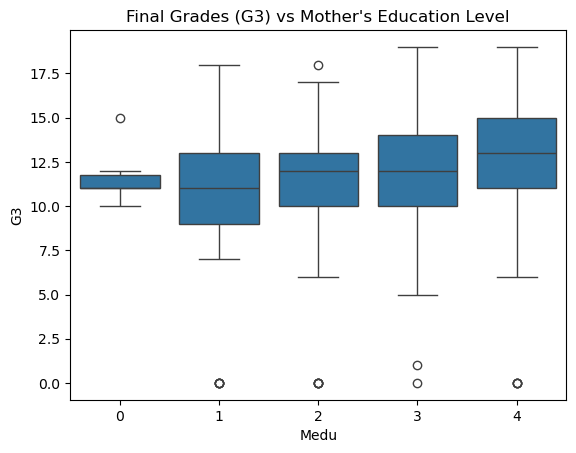

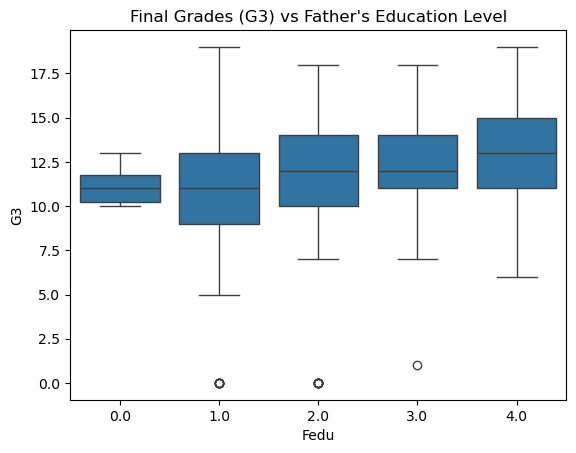

In [17]:
sns.boxplot(x='Medu', y='G3', data=df)
plt.title("Final Grades (G3) vs Mother's Education Level")
plt.show()

sns.boxplot(x='Fedu', y='G3', data=df)
plt.title("Final Grades (G3) vs Father's Education Level")
plt.show()


#### Q2: Does alcohol consumption affect academic performance?

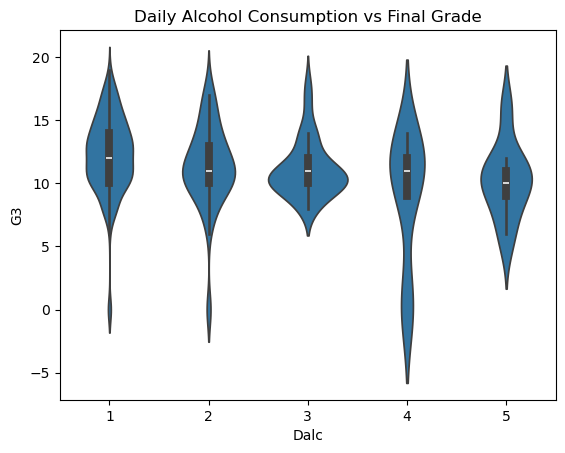

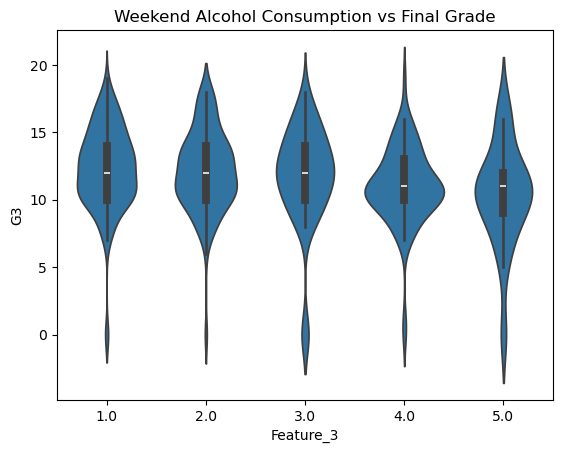

In [ ]:
sns.violinplot(x='Dalc', y='G3', data=df)
plt.title("Daily Alcohol Consumption vs Final Grade")
plt.show()
"feature_3 = walc"
sns.violinplot(x='Feature_3', y='G3', data=df)
plt.title("Weekend Alcohol Consumption vs Final Grade")
plt.show()


#### Q3: Do students with internet access perform better?

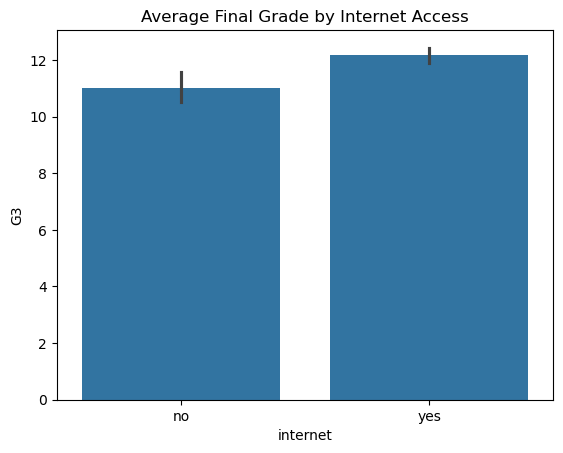

In [22]:
sns.barplot(x='internet', y='G3', data=df)
plt.title("Average Final Grade by Internet Access")
plt.show()


#### Q4: How does study time relate to final grades?

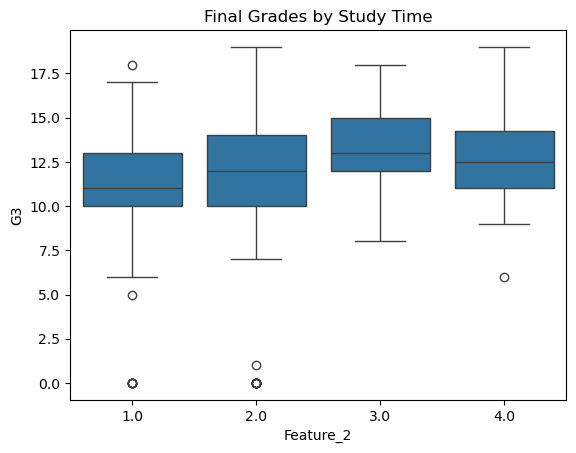

In [ ]:
sns.boxplot(x='Feature_2', y='G3', data=df) #feature 2= study time
plt.title("Final Grades by Study Time")
plt.show()


#### Q5: Does romantic involvement affect student performance?

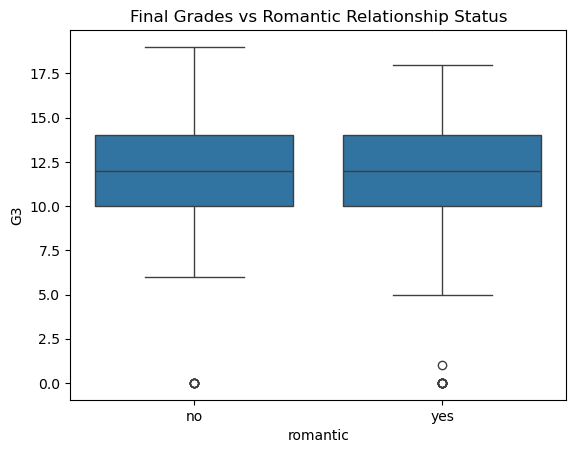

In [ ]:
sns.boxplot(x='romantic', y='G3', data=df)
plt.title("Final Grades vs Romantic Relationship Status")
plt.show()


---

### 1. **Final Grades (G3) vs Mother's Education Level**

**Insight**:
There is a positive trend between the mother’s education level (`Medu`) and students’ final grades. Students whose mothers have higher education (levels 3 or 4) tend to score better. This could imply that more educated mothers may provide better academic support or value education more.

---

### 2. **Final Grades (G3) vs Father’s Education Level**

**Insight**:
Similar to mothers, students with fathers who have higher education levels (especially level 4) tend to achieve better final grades. However, the variation is slightly wider, suggesting other factors might moderate this relationship more for fathers.

---

### 3. **Daily Alcohol Consumption vs Final Grades**

**Insight**:
There’s a visible drop in average final grades as daily alcohol consumption (`Dalc`) increases. Students with higher daily consumption levels (4 and 5) tend to have lower final grades, indicating a potential negative impact of frequent drinking on academic performance.

---

### 4. **Weekend Alcohol Consumption vs Final Grades**

**Insight**:
Weekend alcohol consumption (`Feature_3`) also shows a similar pattern: students who drink heavily on weekends generally have slightly lower final grades. However, the effect appears less pronounced than daily drinking.

---

### 5. **Average Final Grade by Internet Access**

**Insight**:
Students with home internet access have slightly higher average final grades. This suggests that internet availability may help with study resources, research, and assignment completion, thereby supporting academic performance.

---

### 6. **Final Grades by Study Time**

**Insight**:
There’s a clear trend where students who study more hours per week (`Feature_2`) generally perform better. Those in the highest study-time category (4) tend to have higher median and upper-range grades, showing that consistent study habits lead to academic success.

---

### 7. **Final Grades vs Romantic Relationship Status**

**Insight**:
Students in romantic relationships (`romantic = yes`) have slightly lower median grades compared to those not in relationships. While the difference is modest, it might reflect distractions or time management challenges that can come with being in a relationship during school.

---

### LEVEL 4

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd


X = df.drop(columns=['romantic'])
y = df['romantic'].map({'yes': 1, 'no': 0})  # Binary encode

X = pd.get_dummies(X)  # Encode categoricals

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[72 10]
 [38 10]]
              precision    recall  f1-score   support

           0       0.65      0.88      0.75        82
           1       0.50      0.21      0.29        48

    accuracy                           0.63       130
   macro avg       0.58      0.54      0.52       130
weighted avg       0.60      0.63      0.58       130

